<a href="https://colab.research.google.com/github/Folasewa/EmoAI_facerecognition/blob/main/Attention_Final_Year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.2/213.2 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.6 MB/s eta 0:00:00


In [3]:
import os
from ultralytics import YOLO


In [4]:
!pip install roboflow --quiet
from roboflow import Roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00


In [5]:
#%cd /content/drive/MyDrive/New_Yolov8

rf = Roboflow(api_key="A1flBbltSrzc5182GC1K")
project = rf.workspace("gleb").project("driver-drowsiness-detector---hand-gestures--to-train-yolov5")
dataset = project.version(9).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Driver-Drowsiness-Detector-+-Hand-Gestures-[to-train-YOLOv5]-9 in yolov8:: 100%|██████████| 9622/9622 [00:02<00:00, 4139.19it/s]


In [11]:
%cd '/content/datasets'

!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/data.yaml' epochs=25 imgsz=640 plots=True

/content/datasets
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False,

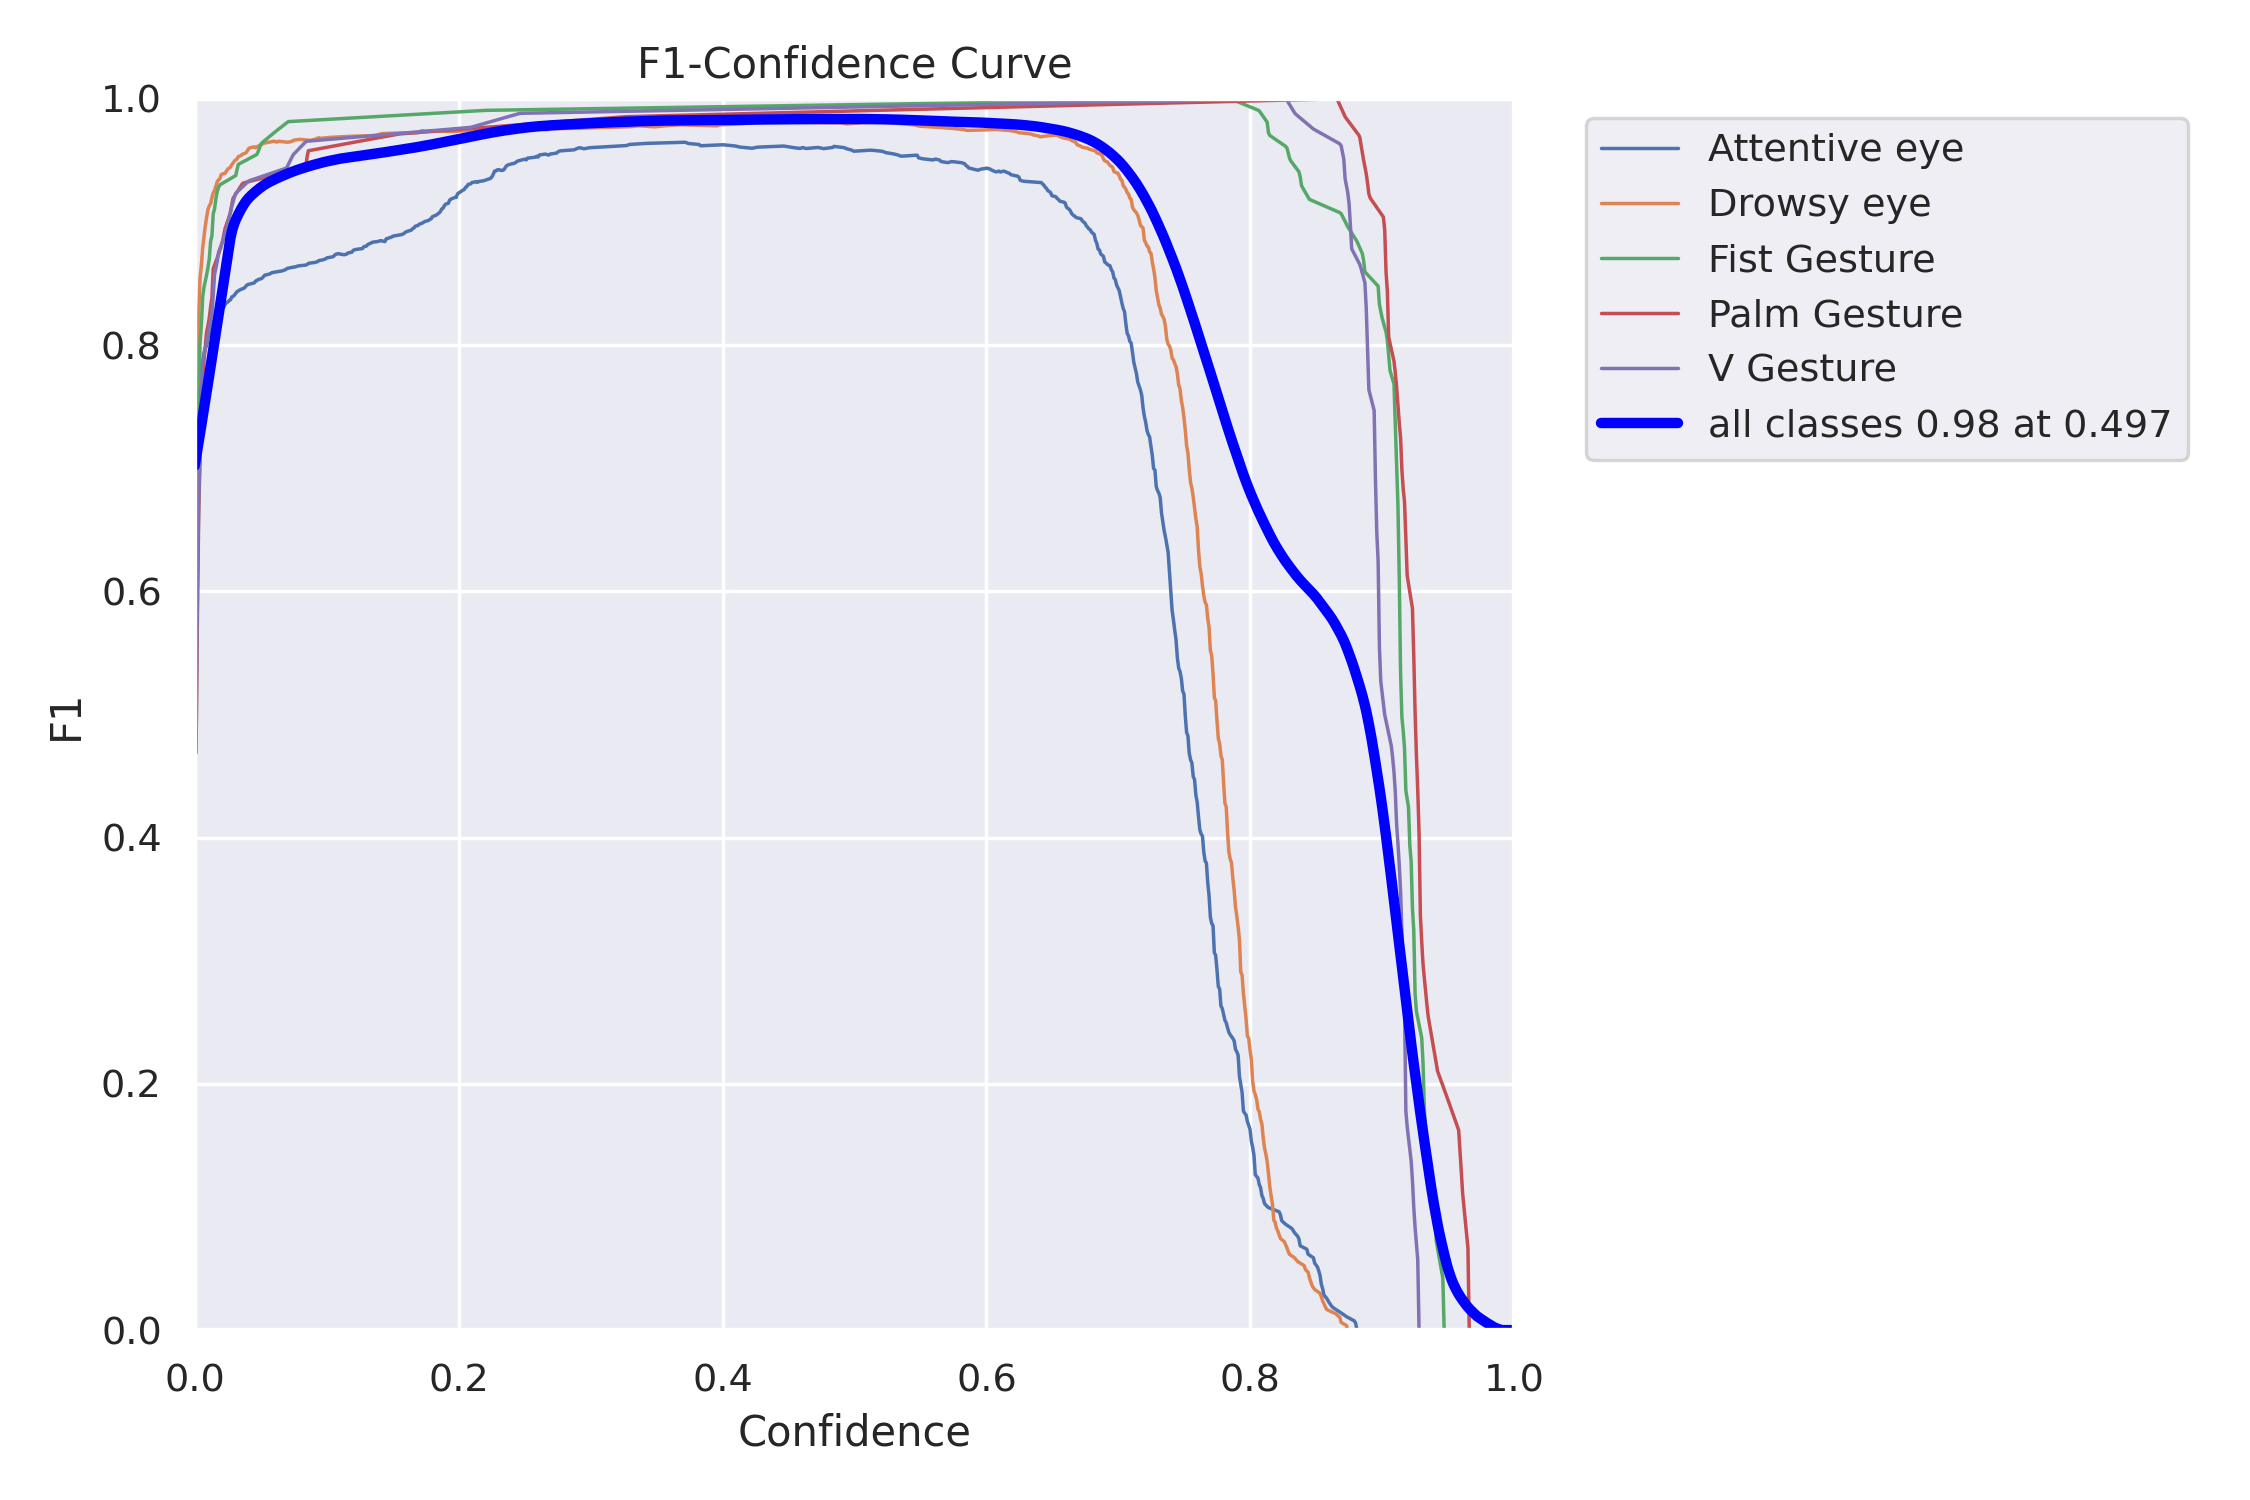

In [13]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/train5/F1_curve.png", width=400, height=400))

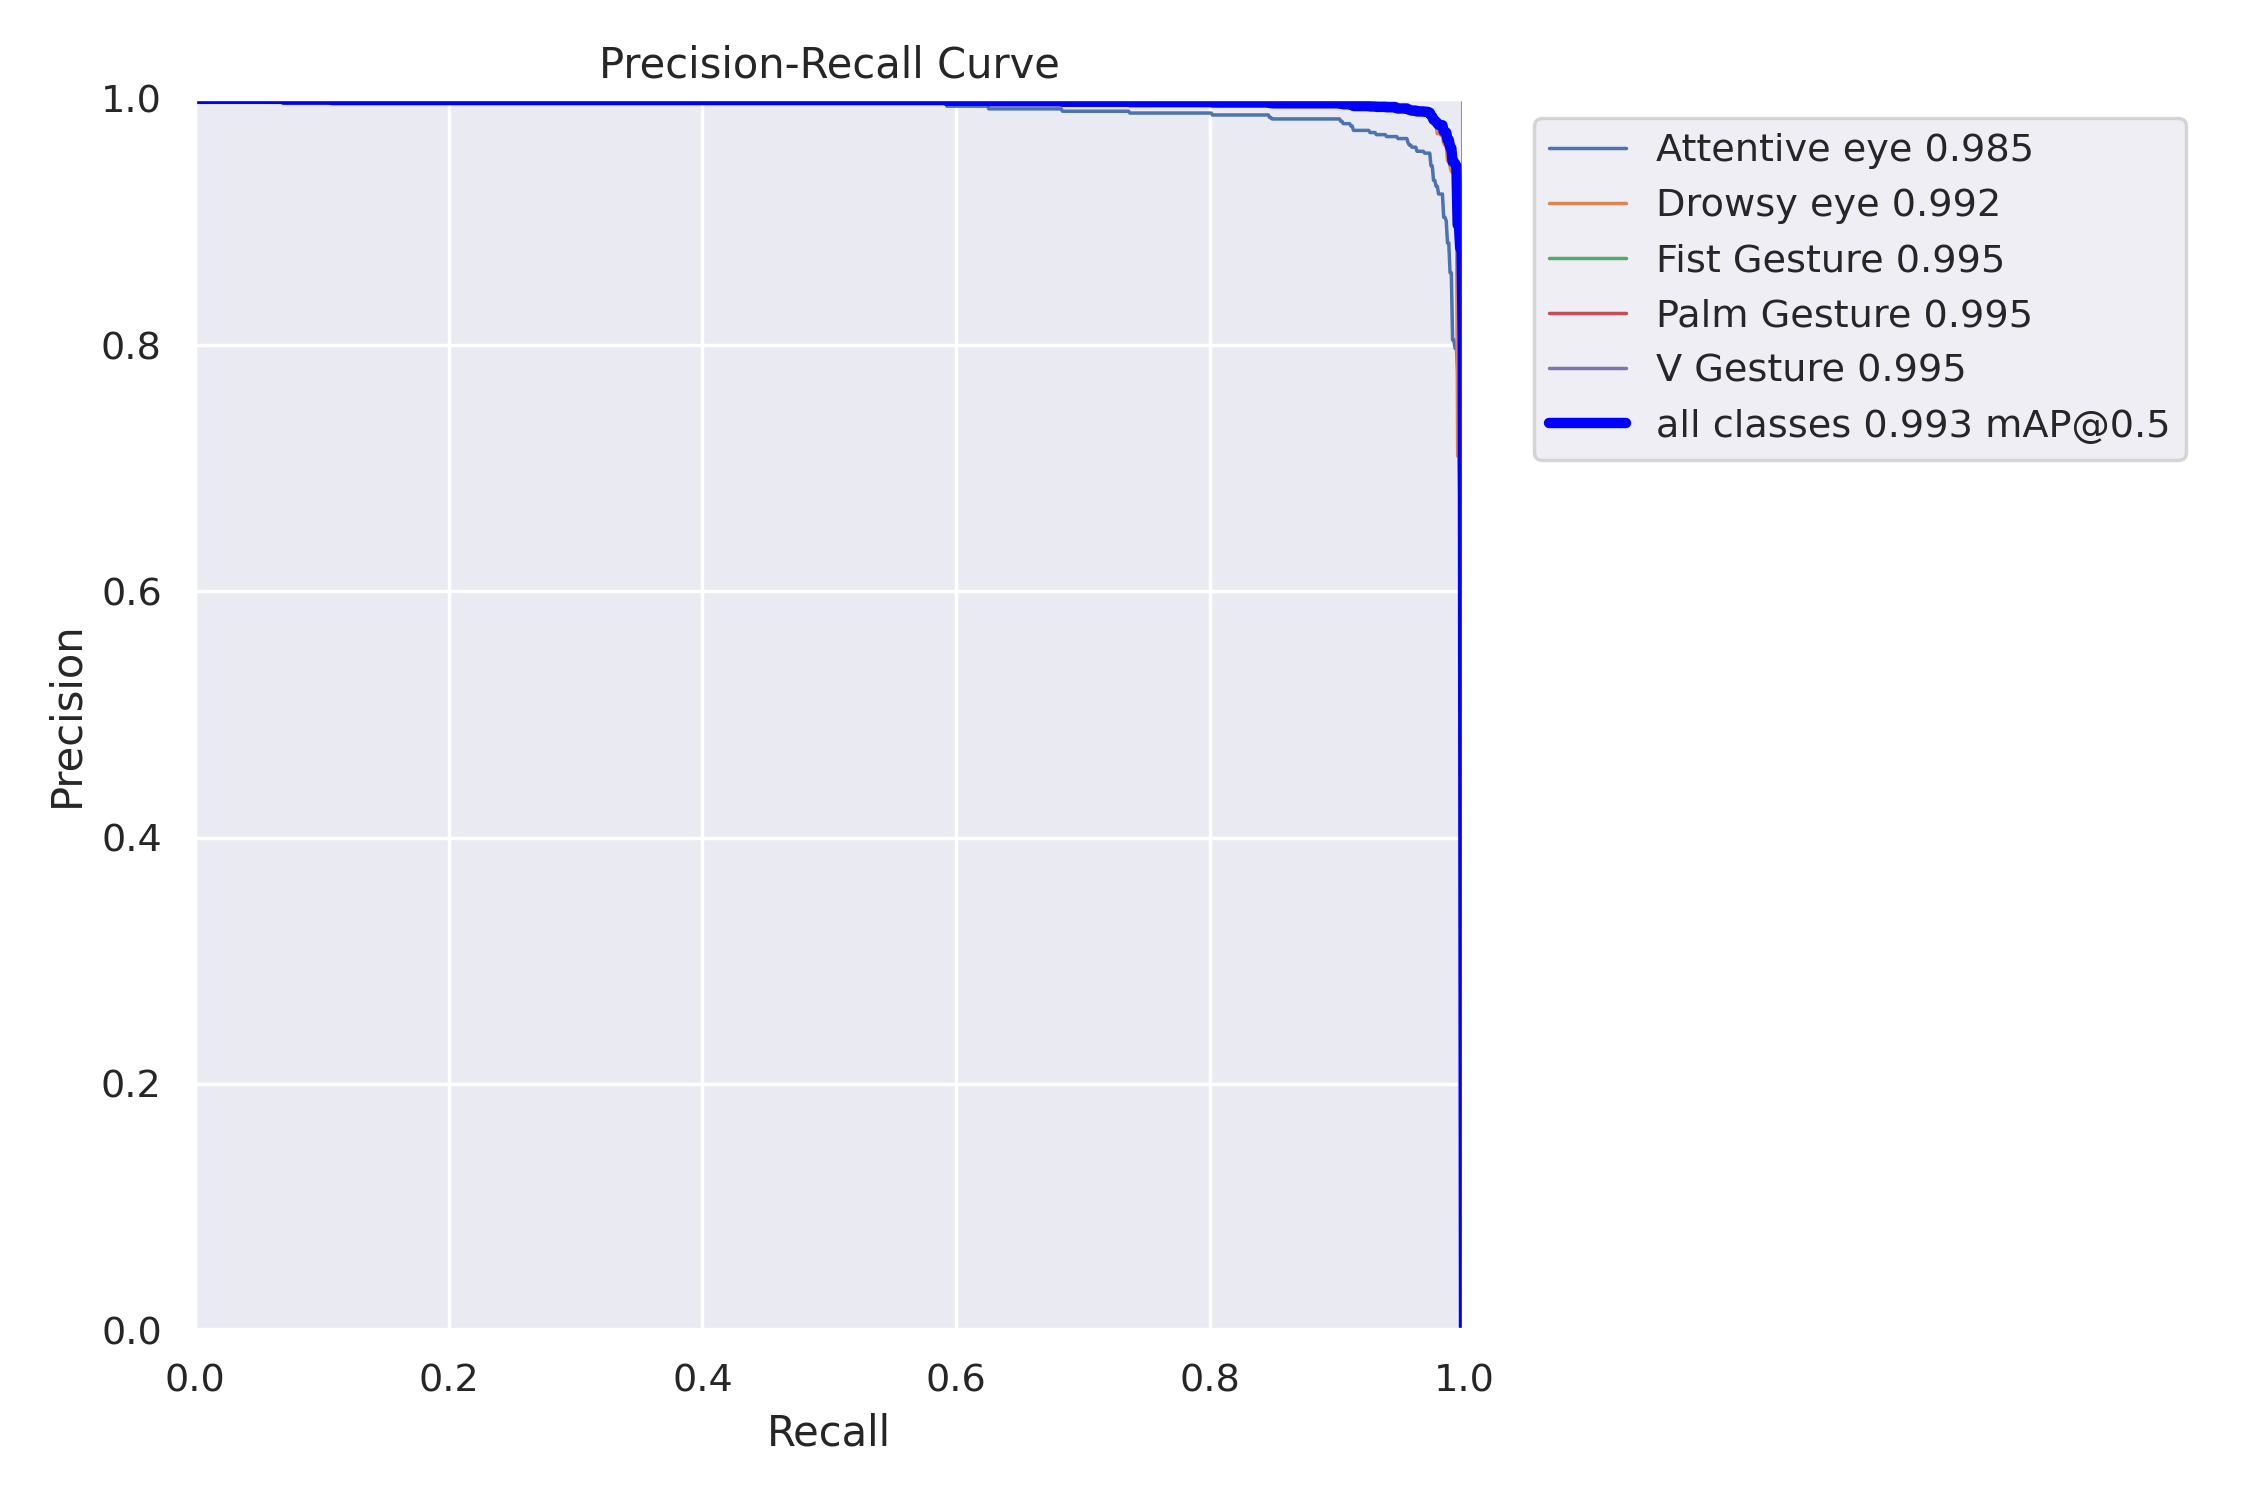

In [14]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/train5/PR_curve.png", width=400, height=400))

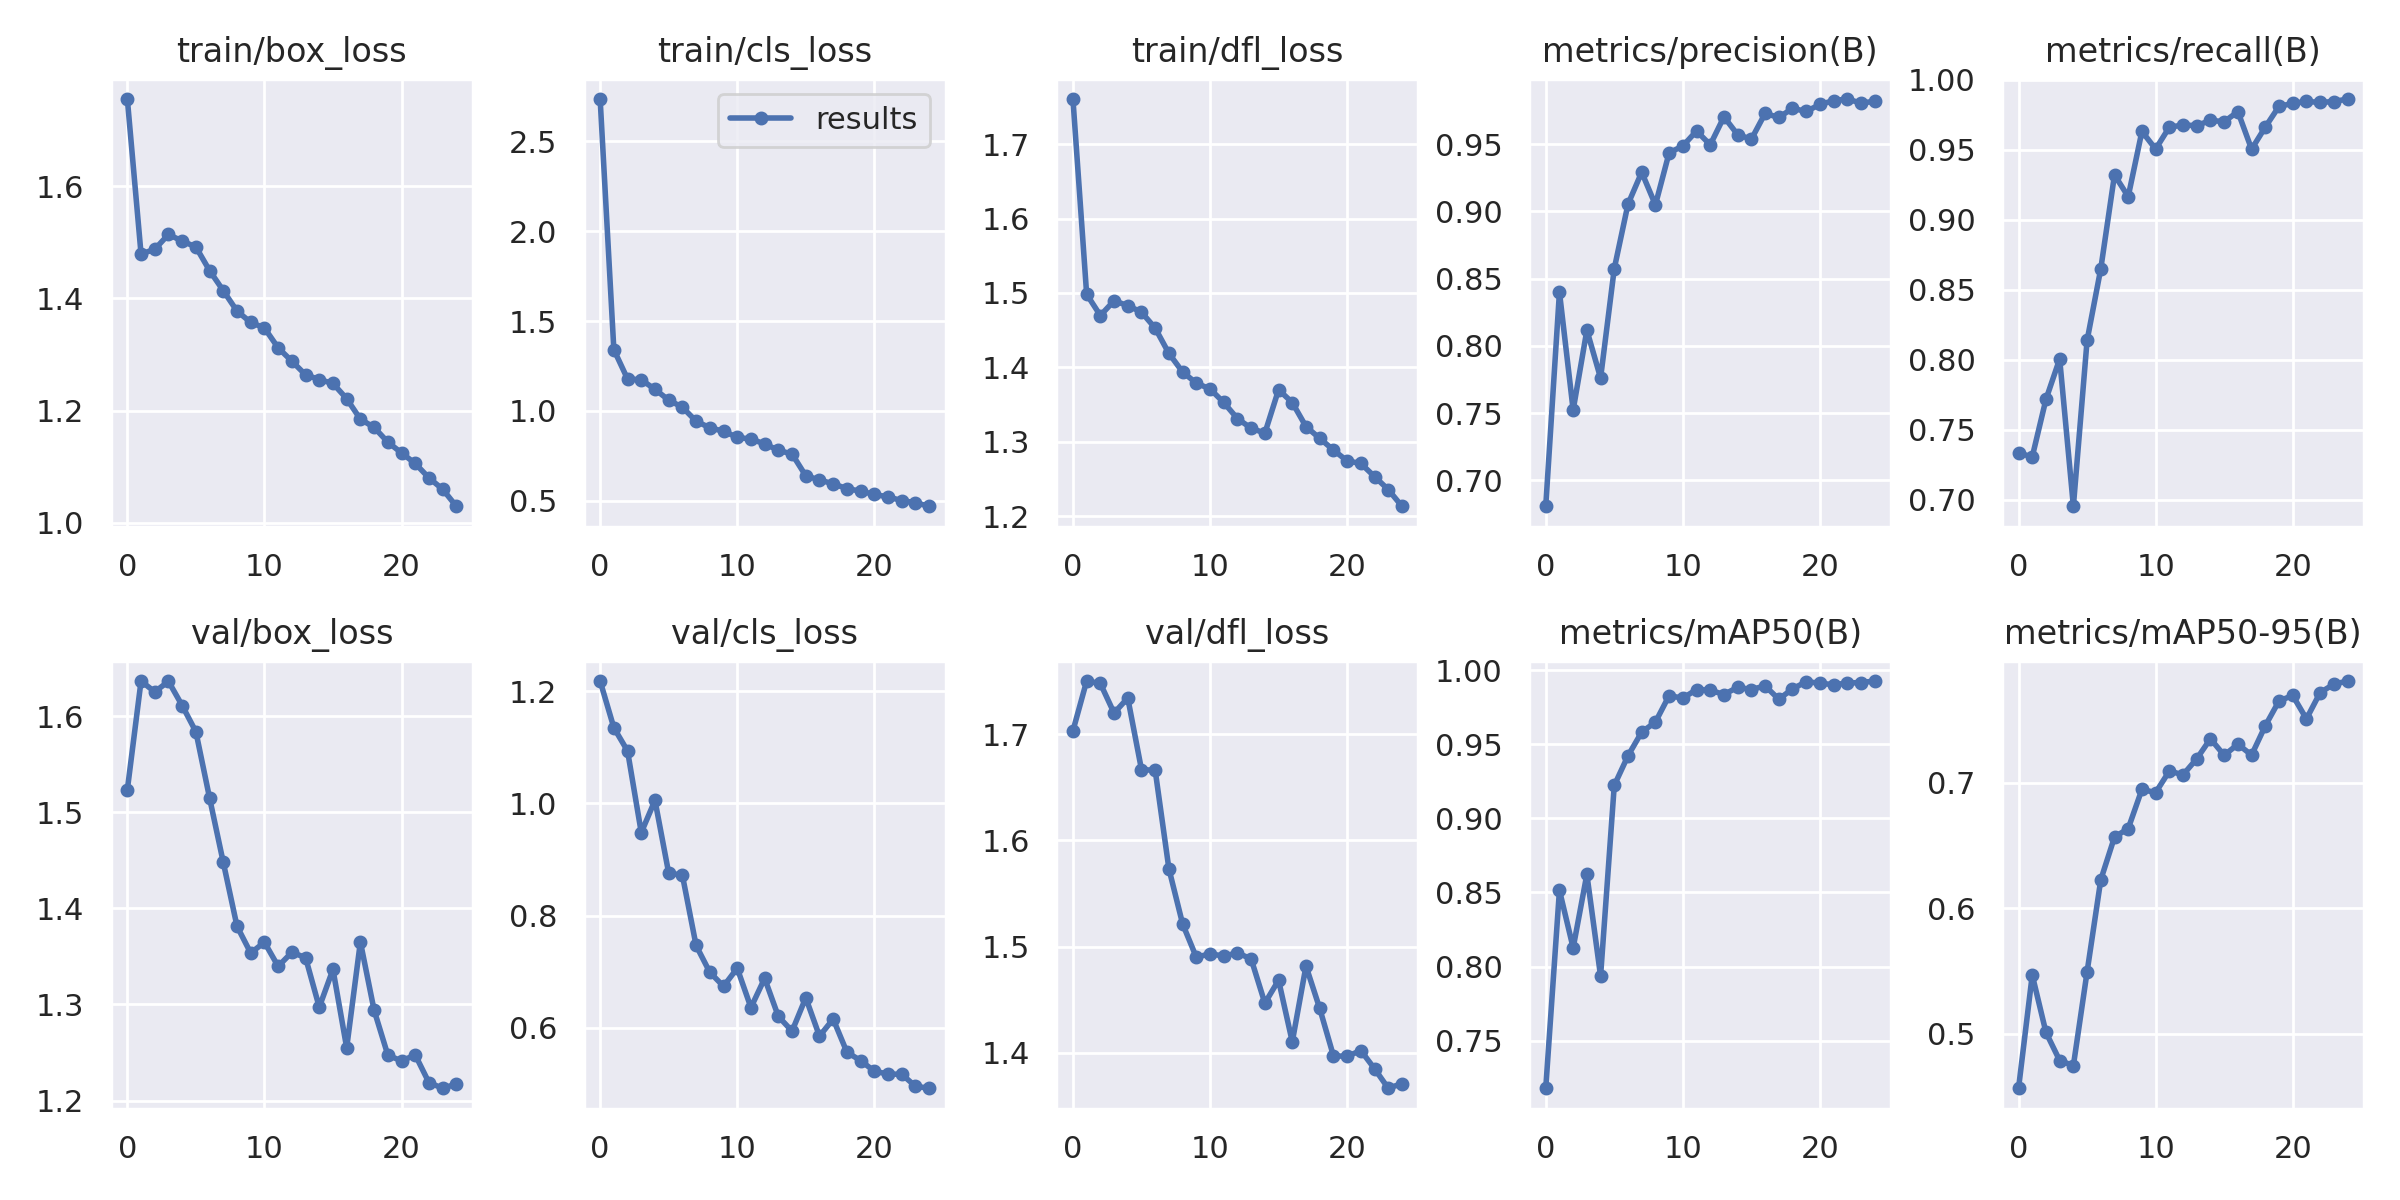

In [ ]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/train5/results.png", width=600))

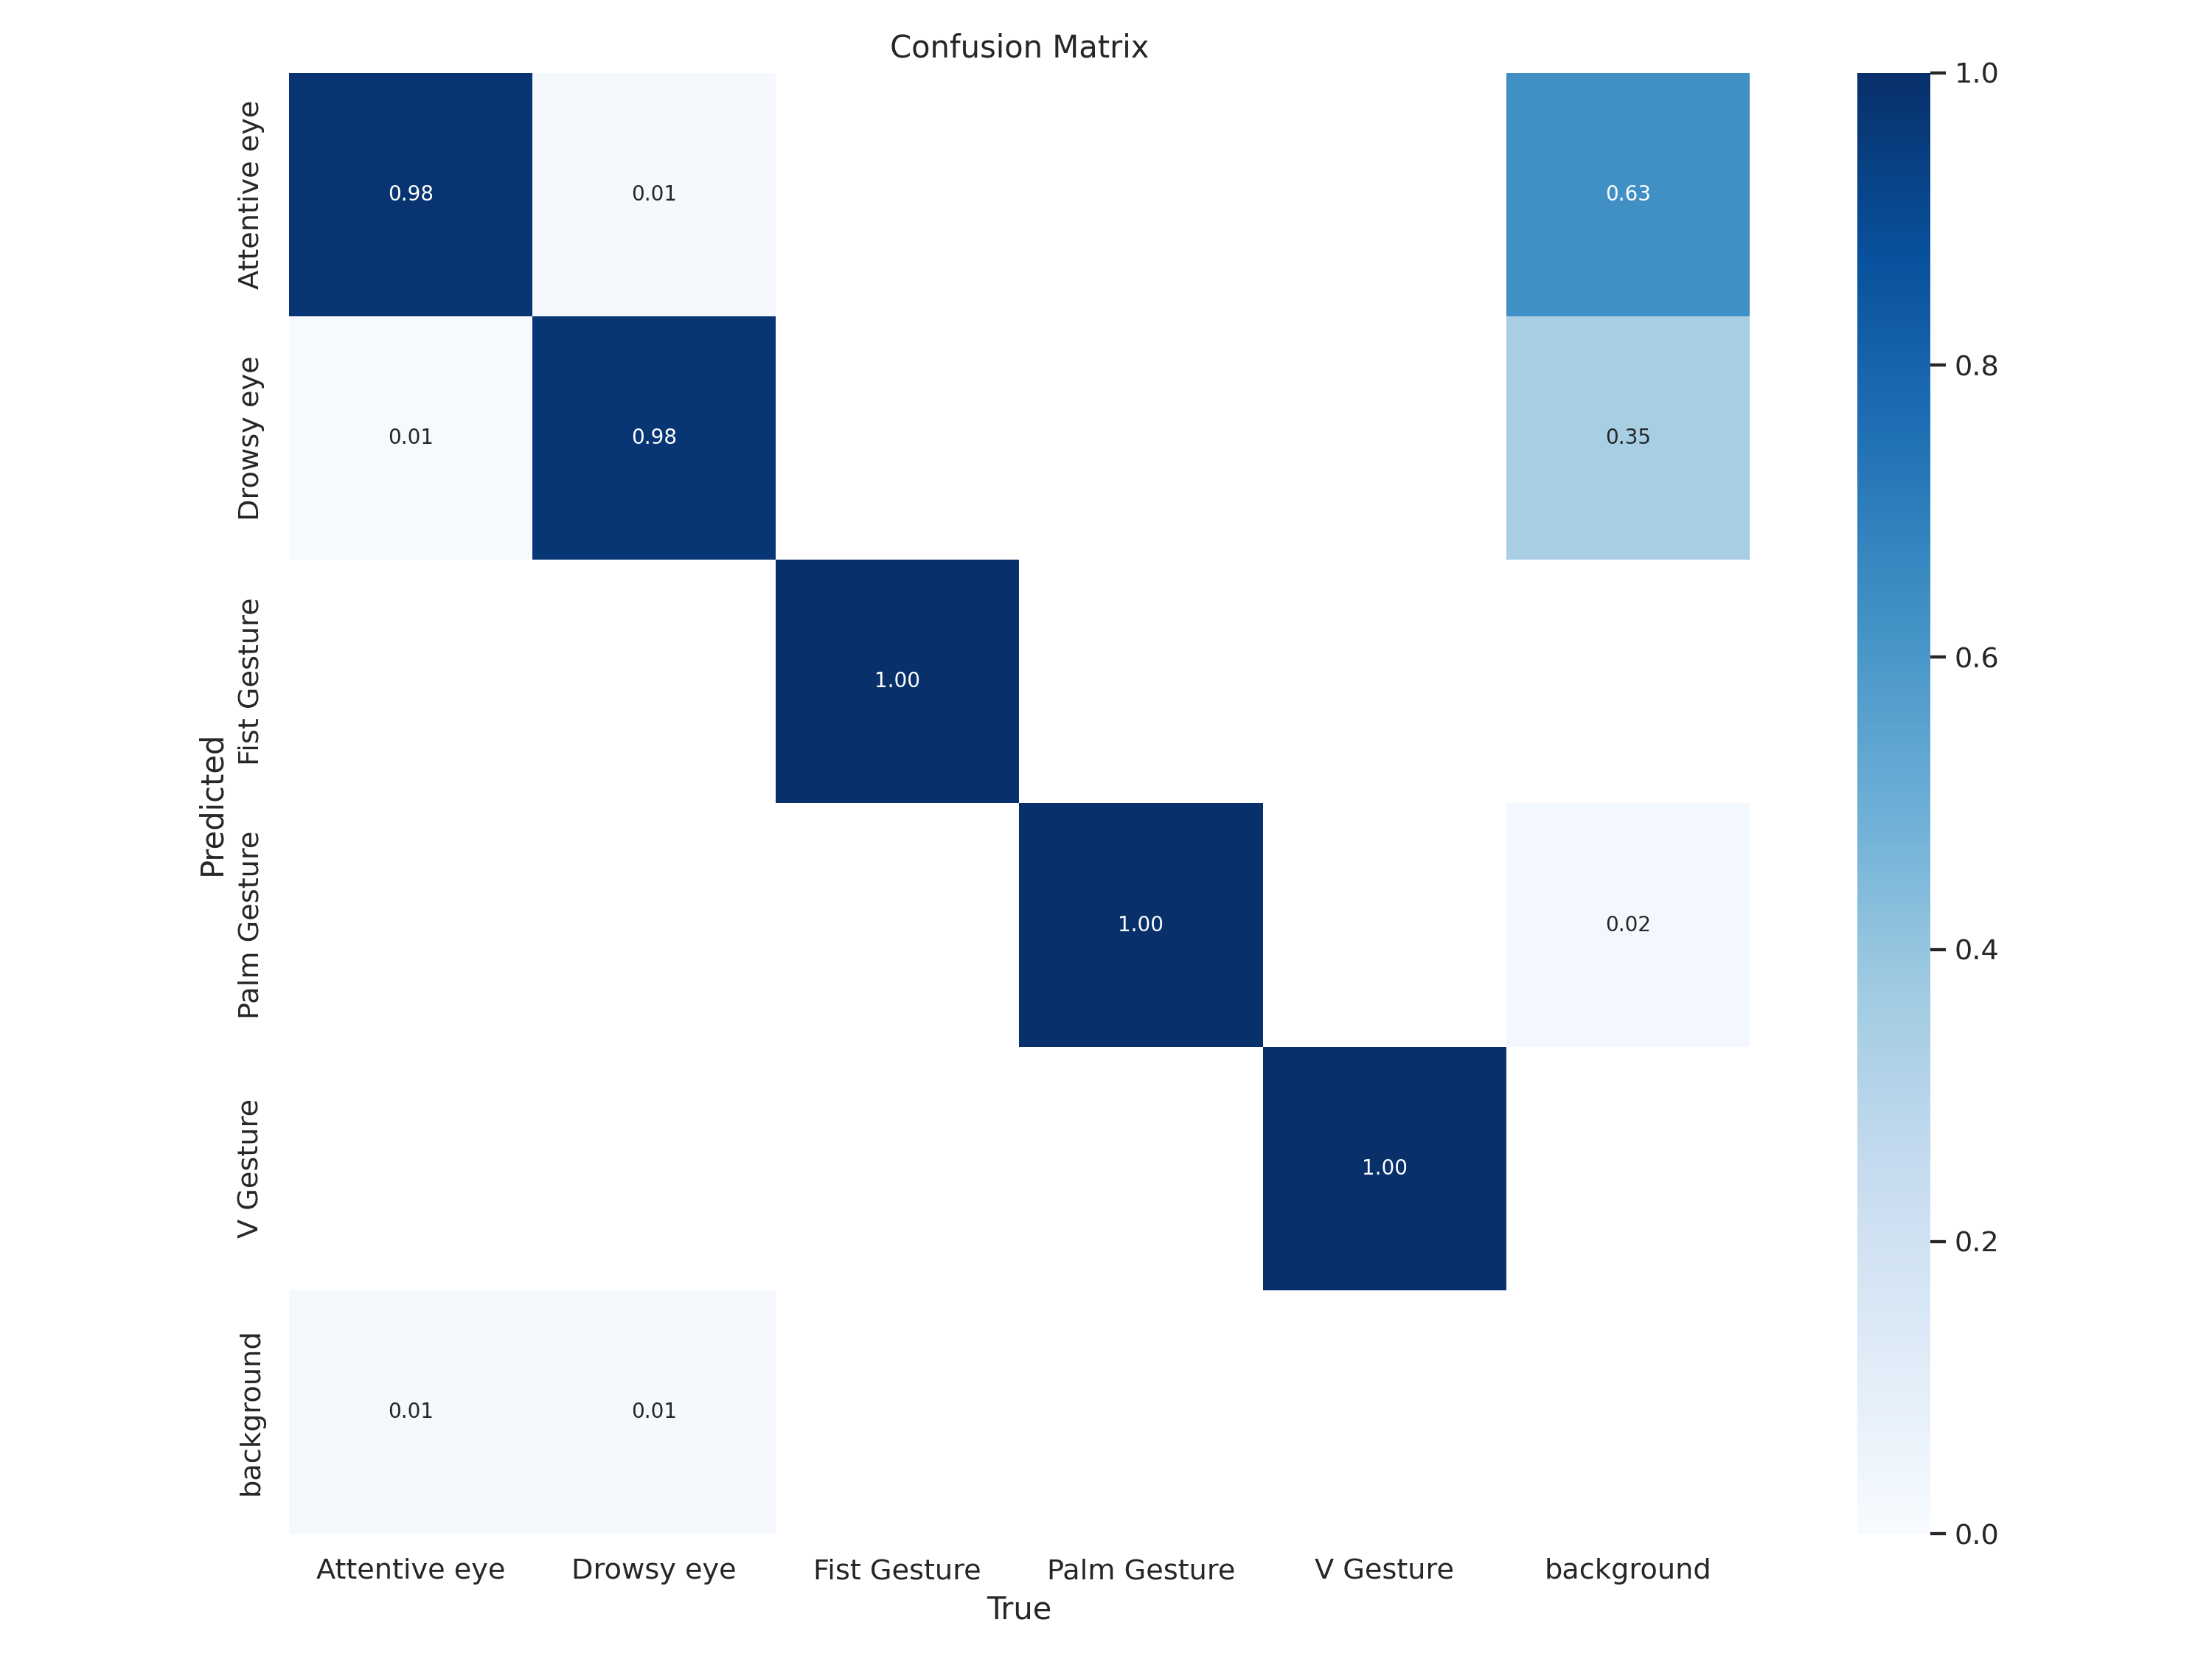

In [15]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/train5/confusion_matrix.png", width=600))

In [16]:
%cd '/content/datasets'
!yolo task=detect mode=val model='/content/datasets/runs/detect/train5/weights/best.pt' data='/content/datasets/data.yaml'

/content/datasets
2023-07-10 22:35:14.466353: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 22:35:15.792494: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 905 images, 12 backgrounds, 0 corrupt: 100% 905/905 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 57/57 [00:16<00:00,  3.37it/s]
                   all        905       1257      0.982      0.986      0.993      0.782
         Attentive eye        905       

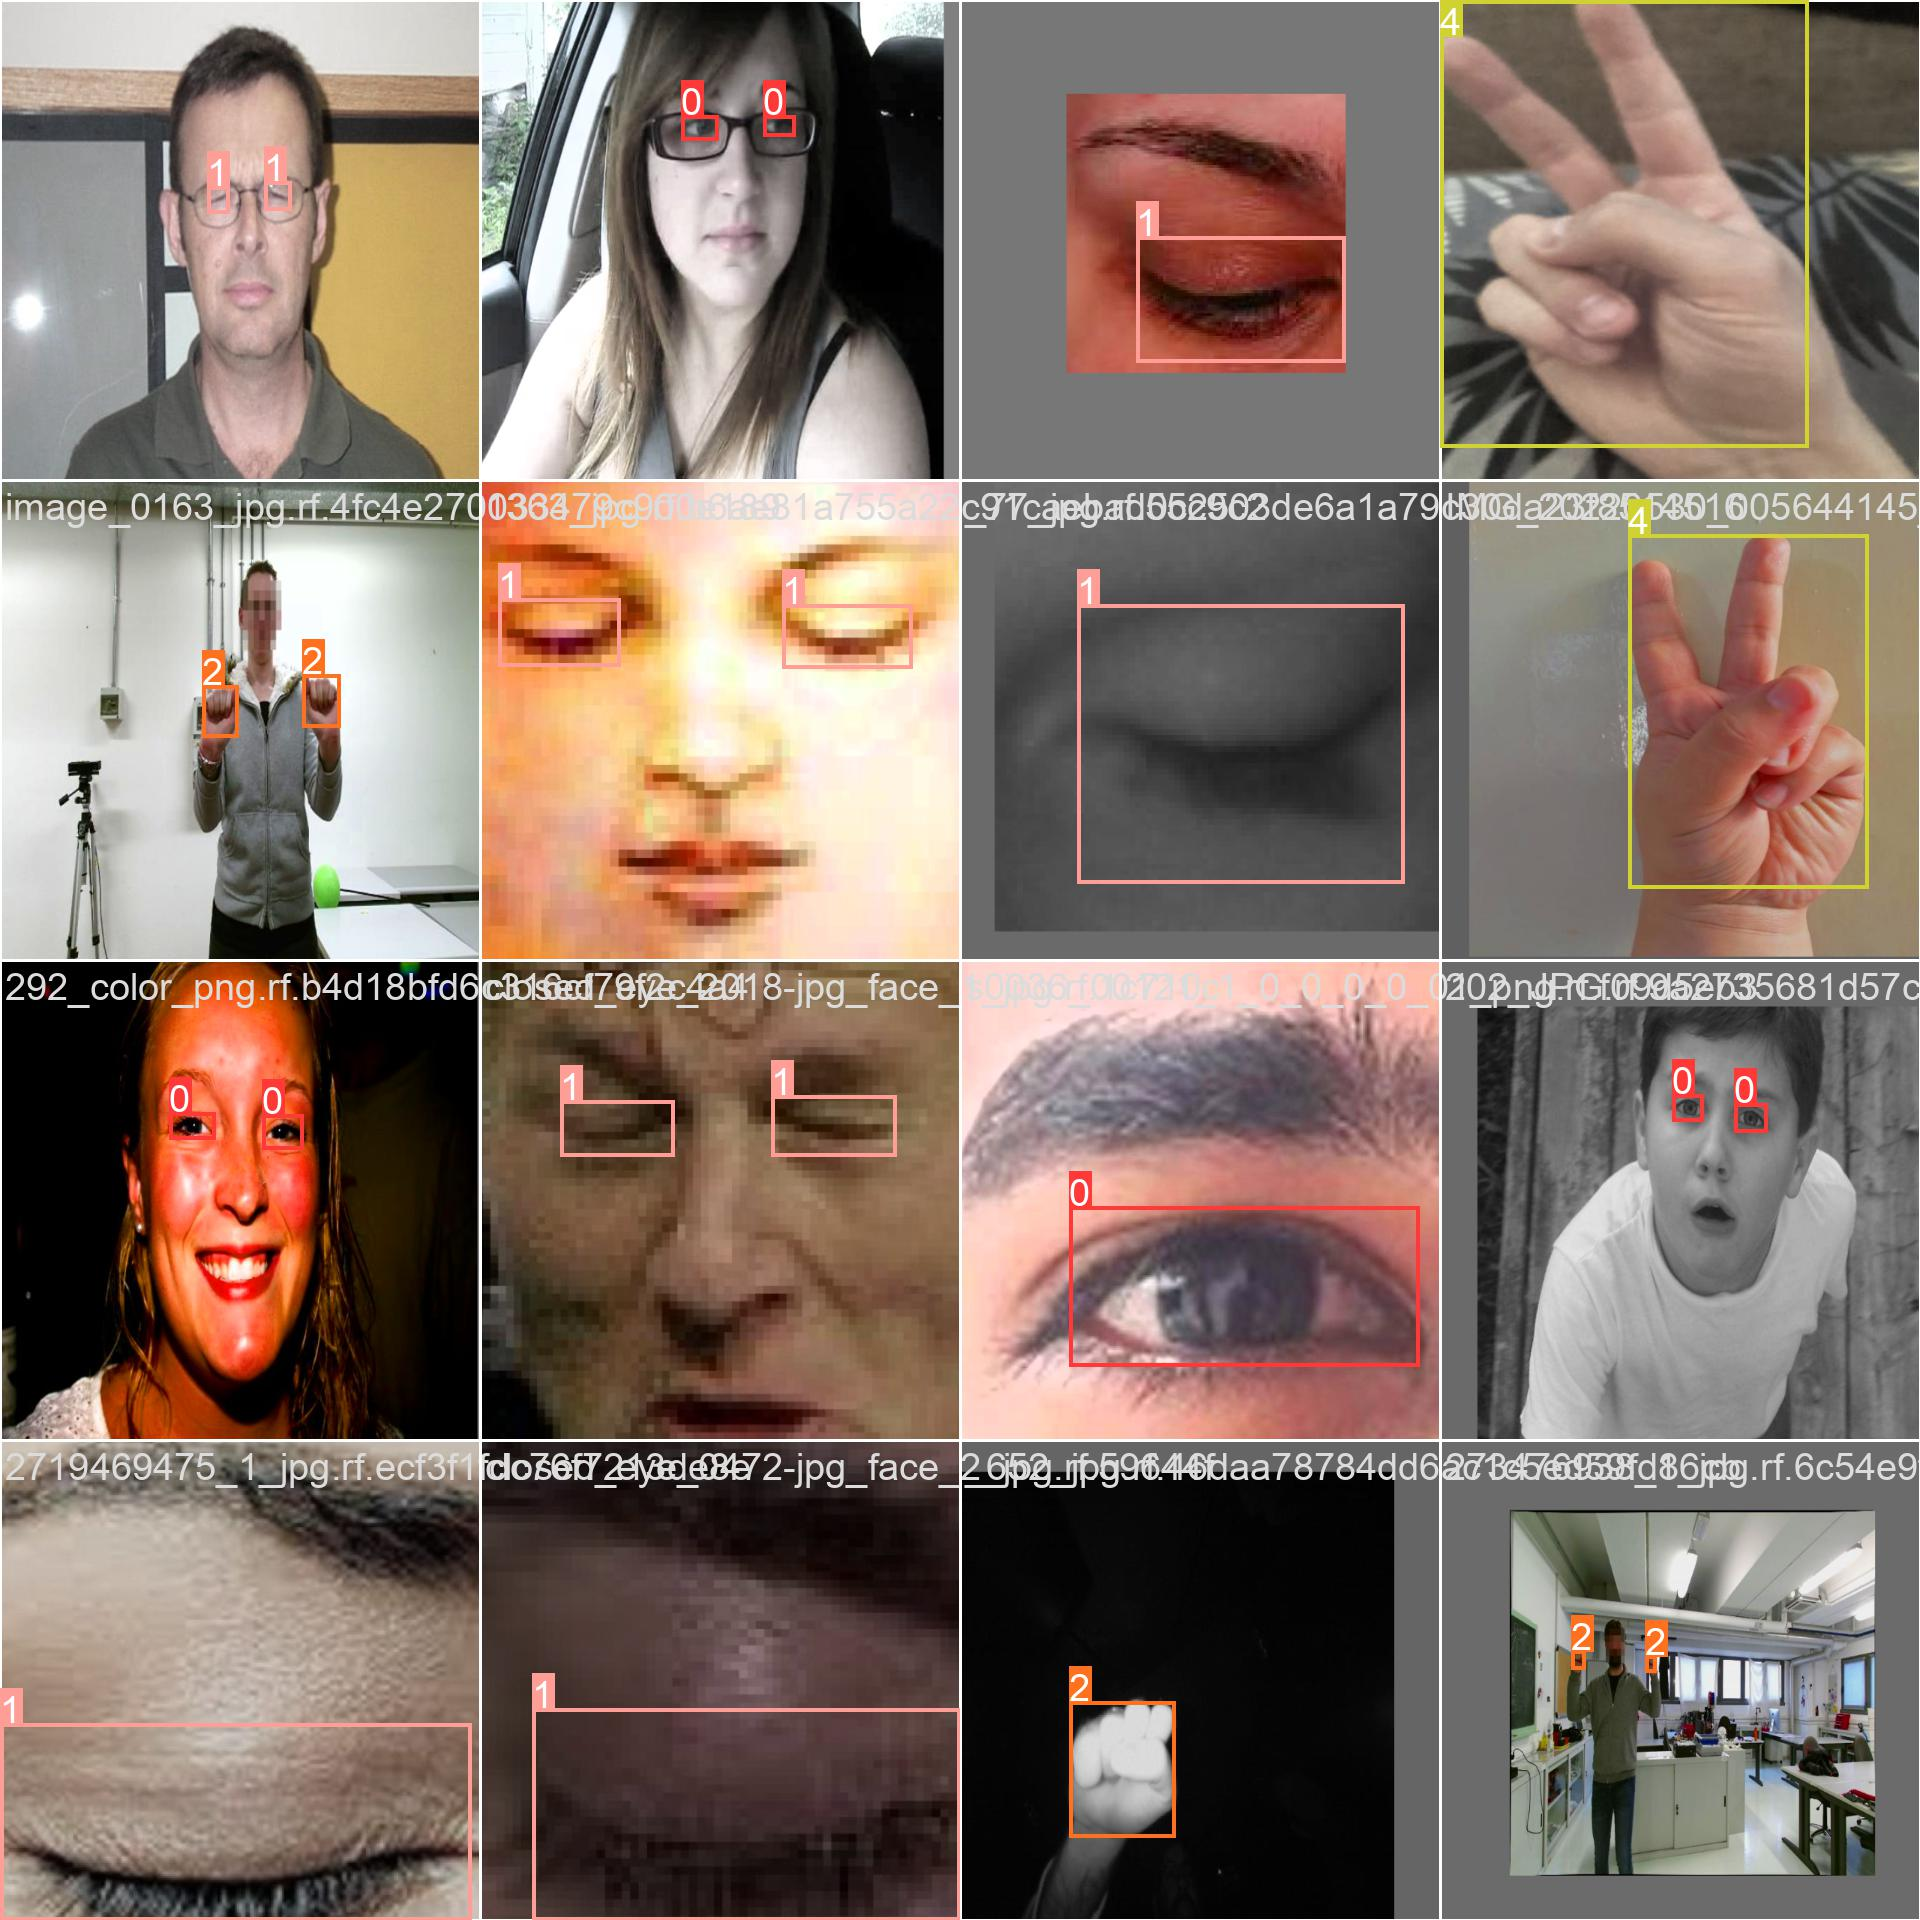

In [17]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/train5/train_batch3287.jpg", width=600))

In [18]:
%cd '/content/datasets'
!yolo task=detect mode=predict model='/content/datasets/runs/detect/train5/weights/best.pt' conf=0.25 source='/content/datasets/test/images' save=True

/content/datasets
2023-07-10 22:36:52.720173: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 22:36:53.561556: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/399 /content/datasets/test/images/000002_jpg.rf.d61f74cfaa9c653b1f28a610d1414b0e.jpg: 640x640 1 Attentive eye, 18.2ms
image 2/399 /content/datasets/test/images/000004_jpg.rf.17ab9695485bc8d000bb0adadd73d145.jpg: 640x640 1 Attentive eye, 16.3ms
image 3/399 /content/datasets/test/images/000008_jpg.rf.c7fa6d9f7f39b52ada9865d596504492.jpg: 640x640 1 Attentive eye, 16.3ms


In [20]:
!yolo task=detect mode=predict model='/content/datasets/runs/detect/train5/weights/best.pt' conf=0.25 source='/content/att1.jpg' save=True

2023-07-10 22:40:49.501059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 22:40:50.724583: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/att1.jpg: 320x640 2 Attentive eyes, 59.4ms
Speed: 0.4ms pre-process, 59.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


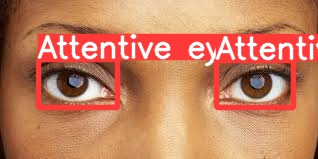

In [21]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/predict2/att1.jpg", width=600))

In [ ]:
#@title Default title text
#project.version(4).deploy(model_type="yolov8", model_path='/content/datasets/runs/detect/train2')

In [24]:
!yolo task=detect mode=predict model='/content/datasets/runs/detect/train5/weights/best.pt' conf=0.25 source='/content/att2.jpg' save=True

2023-07-10 22:44:52.060194: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 22:44:53.051591: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/att2.jpg: 384x640 1 Attentive eye, 61.2ms
Speed: 0.5ms pre-process, 61.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


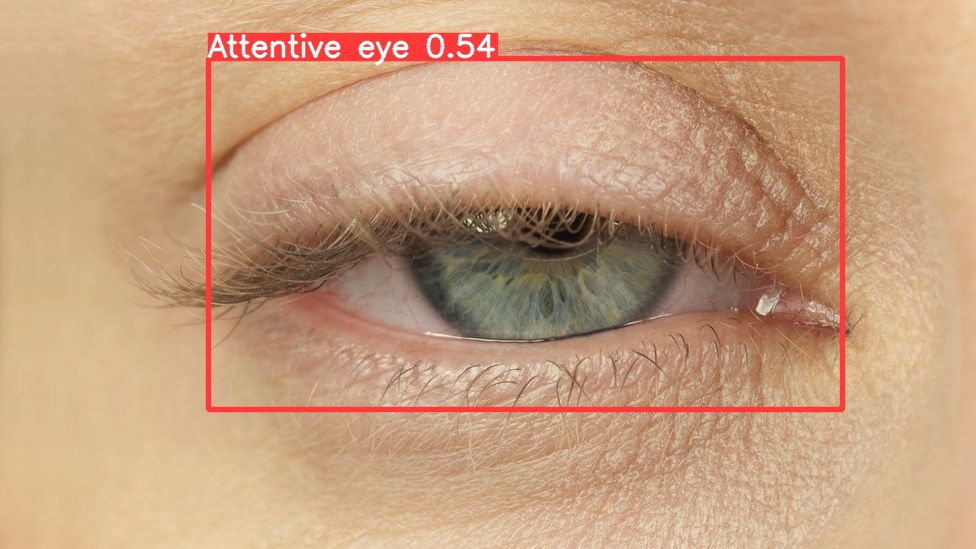

In [26]:
display(Image("/content/datasets/runs/detect/predict3/att2.jpg", width=600))

In [27]:
from google.colab import files
files.download('/content/datasets/runs/detect/train5/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>